In [ ]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
now_date = datetime.now().date()
delta_years = 10
start_date_str = (now_date - timedelta(days=10 * 365)).strftime("%Y-%m-%d")
end_date_str = now_date.strftime("%Y-%m-%d")
print(start_date_str, end_date_str)

2015-06-20 2025-06-17


In [ ]:
# Данные акций apple за 10 лет
ticker = "AAPL"
aapl_data = yf.download(ticker, start=start_date_str, end=end_date_str)

time_series = aapl_data["Close"]

print(time_series.head(), end="\n\n")
print(time_series.tail())


/tmp/ipykernel_334676/3224151828.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download(ticker, start=start_date_str, end=end_date_str)
[*********************100%***********************]  1 of 1 completed

Ticker           AAPL
Date                 
2015-06-22  28.580402
2015-06-23  28.450506
2015-06-24  28.692390
2015-06-25  28.555777
2015-06-26  28.387796

Ticker            AAPL
Date                  
2025-06-10  202.669998
2025-06-11  198.779999
2025-06-12  199.199997
2025-06-13  196.449997
2025-06-16  198.419998


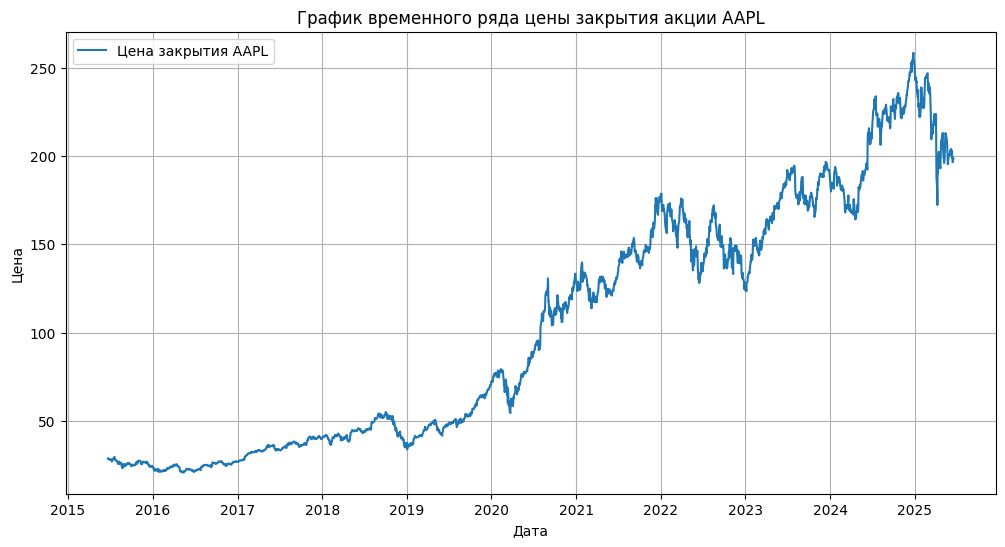

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label=f"Цена закрытия {ticker}")
plt.title(f"График временного ряда цены закрытия акции {ticker}")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# Calculate first-order difference
time_series_diff1 = time_series.diff(periods=1).dropna()

# Calculate second-order difference
time_series_diff2 = time_series_diff1.diff(periods=1).dropna()
# Alternatively, time_series_diff2 = time_series.diff(periods=1).diff(periods=1).dropna()


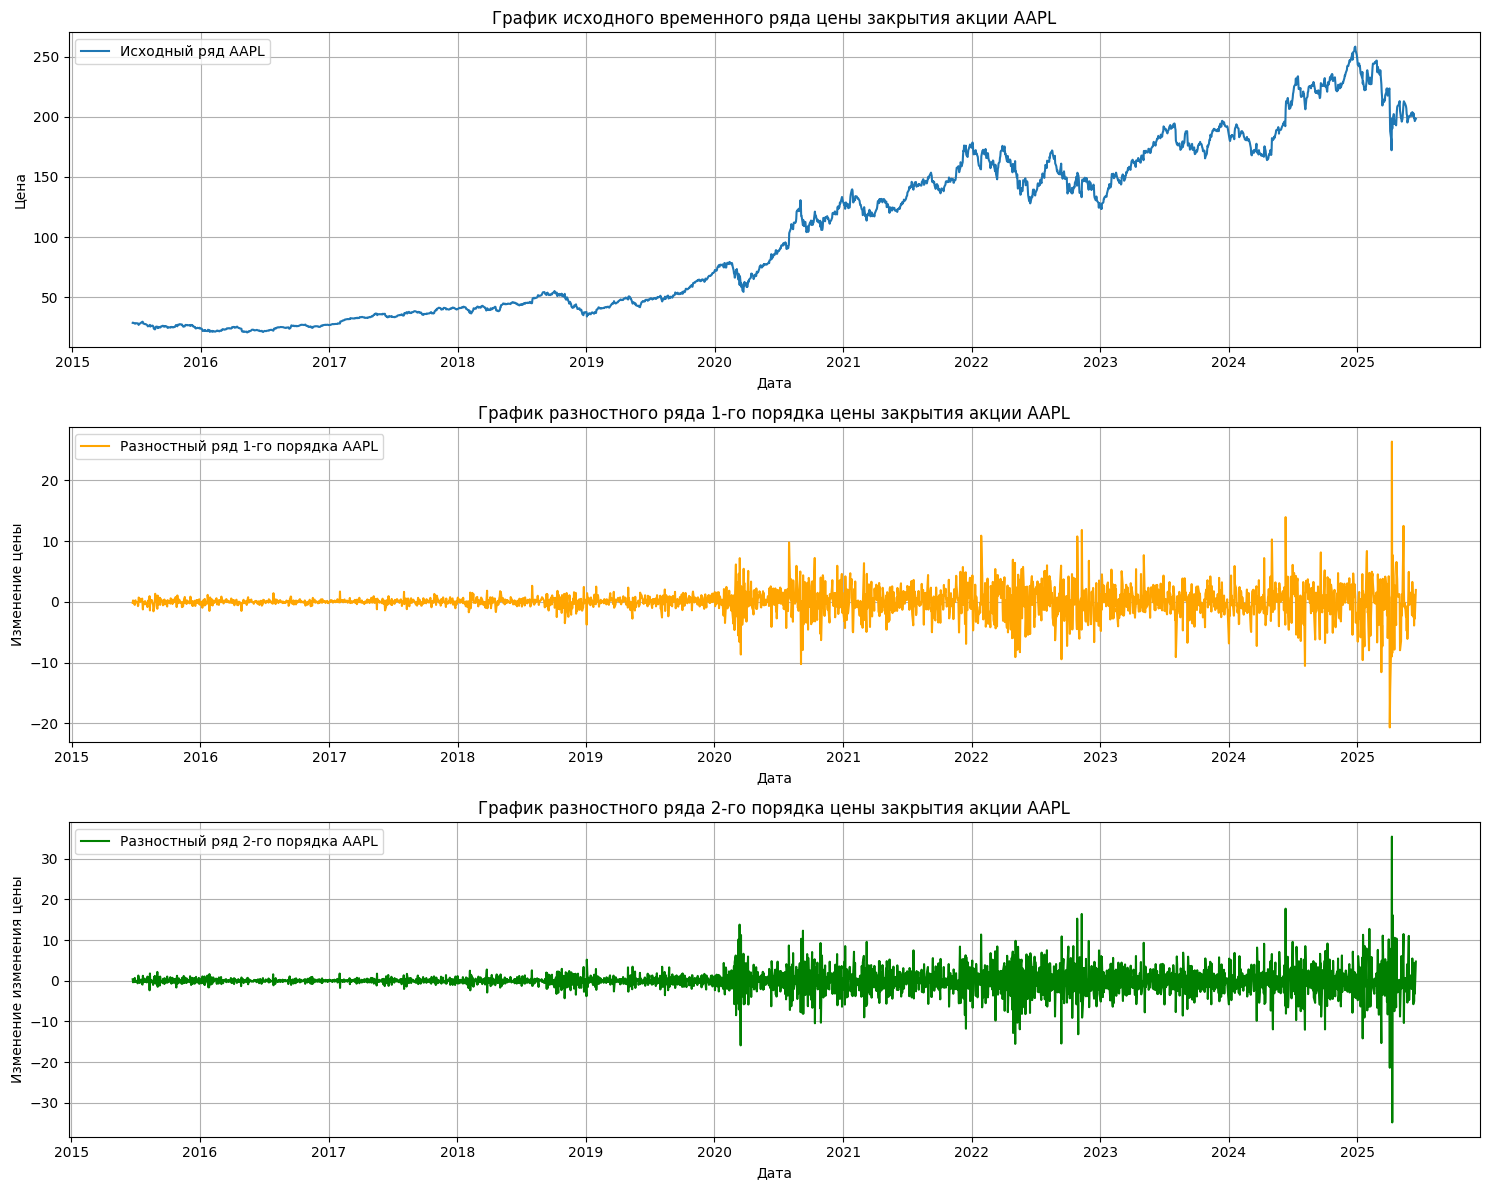

In [ ]:
# Plotting the original, first-order, and second-order differenced series
plt.figure(figsize=(15, 12))

# Original Series Plot
plt.subplot(3, 1, 1)
plt.plot(time_series, label=f"Исходный ряд {ticker}")
plt.title(f"График исходного временного ряда цены закрытия акции {ticker}")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.legend()

# First-Order Differenced Series Plot
plt.subplot(3, 1, 2)
plt.plot(
    time_series_diff1, label=f"Разностный ряд 1-го порядка {ticker}", color="orange"
)
plt.title(f"График разностного ряда 1-го порядка цены закрытия акции {ticker}")
plt.xlabel("Дата")
plt.ylabel("Изменение цены")
plt.grid(True)
plt.legend()

# Second-Order Differenced Series Plot
plt.subplot(3, 1, 3)
plt.plot(
    time_series_diff2, label=f"Разностный ряд 2-го порядка {ticker}", color="green"
)
plt.title(f"График разностного ряда 2-го порядка цены закрытия акции {ticker}")
plt.xlabel("Дата")
plt.ylabel("Изменение изменения цены")
plt.grid(True)
plt.legend()

plt.tight_layout()  # Автоматически настраивает параметры подгонки для плотного размещения подграфиков
plt.show()


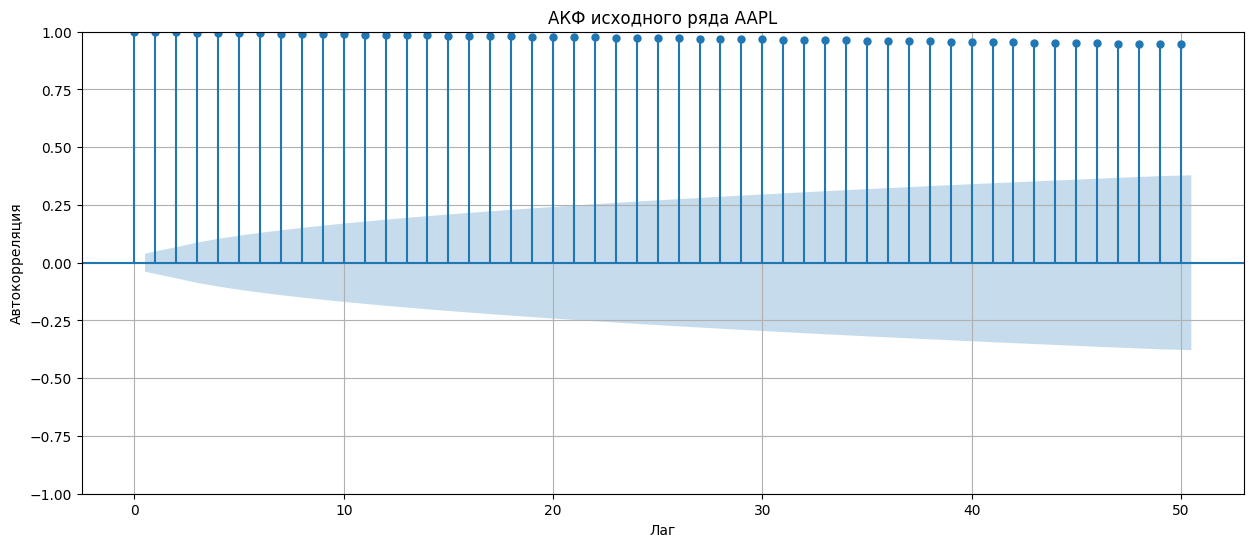

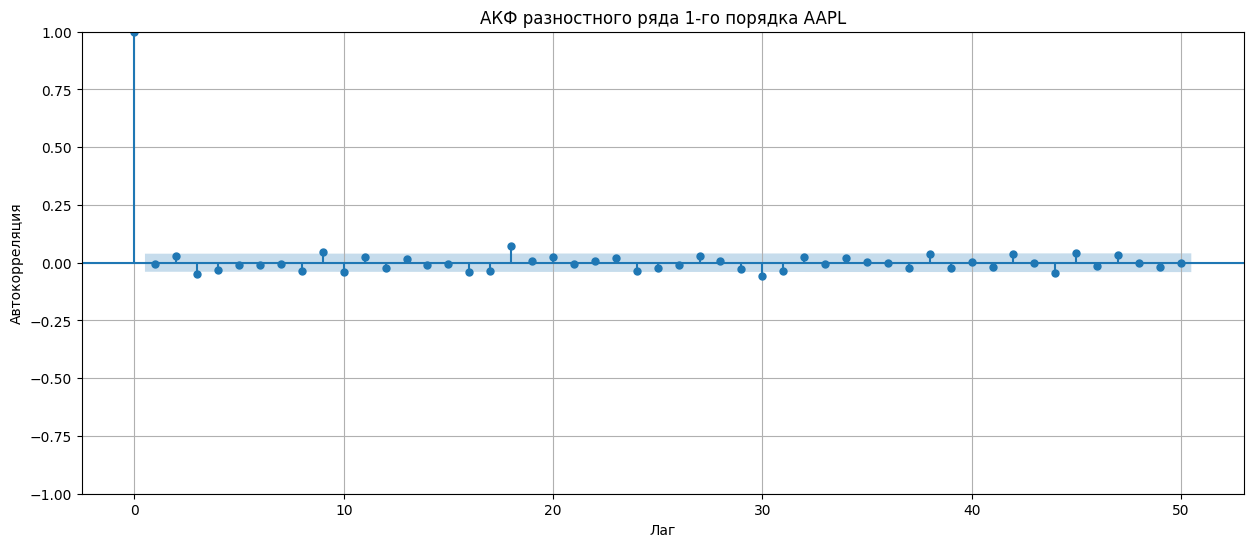

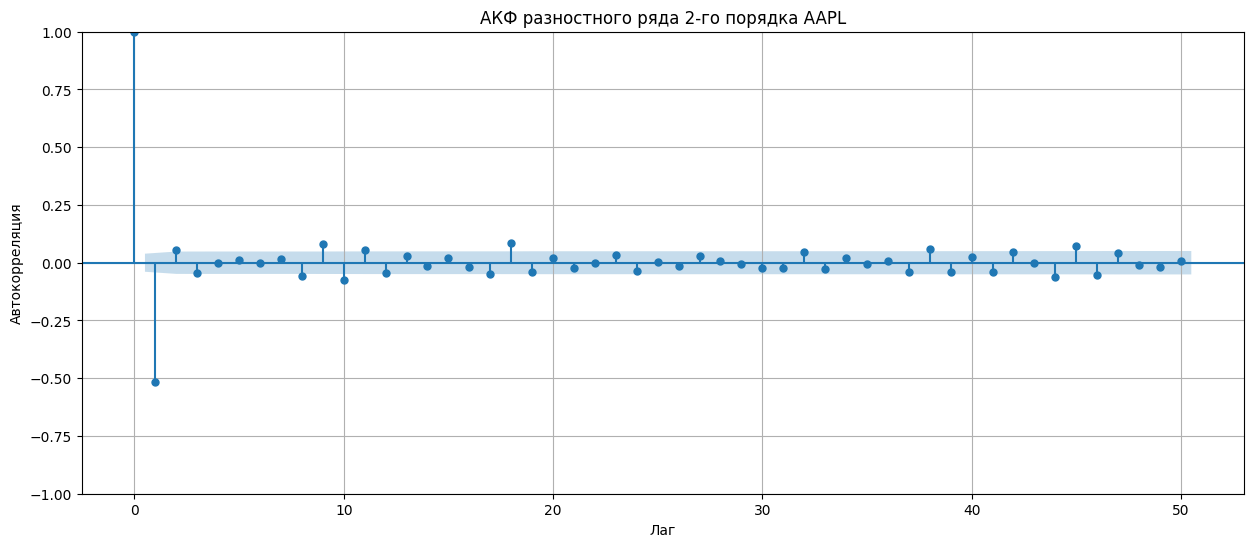

In [ ]:
# Plotting ACF for Original Series
plt.figure(figsize=(15, 6))
plot_acf(time_series, lags=50, ax=plt.gca(), title=f"АКФ исходного ряда {ticker}")
plt.xlabel("Лаг")
plt.ylabel("Автокорреляция")
plt.grid(True)
plt.show()

# Plotting ACF for First-Order Differenced Series
plt.figure(figsize=(15, 6))
plot_acf(
    time_series_diff1,
    lags=50,
    ax=plt.gca(),
    title=f"АКФ разностного ряда 1-го порядка {ticker}",
)
plt.xlabel("Лаг")
plt.ylabel("Автокорреляция")
plt.grid(True)
plt.show()

# Plotting ACF for Second-Order Differenced Series
plt.figure(figsize=(15, 6))
plot_acf(
    time_series_diff2,
    lags=50,
    ax=plt.gca(),
    title=f"АКФ разностного ряда 2-го порядка {ticker}",
)
plt.xlabel("Лаг")
plt.ylabel("Автокорреляция")
plt.grid(True)
plt.show()

In [ ]:
def run_adf_test(series, name):
    """
    Performs and prints the results of the Augmented Dickey-Fuller test.
    """
    print(f"--- Результаты ADF-теста для: {name} ---")
    result = adfuller(
        series.dropna(), autolag="AIC"
    )  # dropna() is crucial for differenced series

    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")

    if result[1] <= 0.05:
        print("Вывод: p-value <= 0.05. Отвергаем нулевую гипотезу (ряд стационарен).")
    else:
        print(
            "Вывод: p-value > 0.05. Не можем отвергнуть нулевую гипотезу (ряд нестационарен)."
        )
    print("-" * 50)


# Apply ADF test to the original series
run_adf_test(time_series, "Исходный ряд")

# Apply ADF test to the first-order differenced series
run_adf_test(time_series_diff1, "Разностный ряд 1-го порядка")

# Apply ADF test to the second-order differenced series
run_adf_test(time_series_diff2, "Разностный ряд 2-го порядка")

--- Результаты ADF-теста для: Исходный ряд ---
ADF Statistic: -0.4655
p-value: 0.8986
Critical Values:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
Вывод: p-value > 0.05. Не можем отвергнуть нулевую гипотезу (ряд нестационарен).
--------------------------------------------------
--- Результаты ADF-теста для: Разностный ряд 1-го порядка ---
ADF Statistic: -12.0900
p-value: 0.0000
Critical Values:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
Вывод: p-value <= 0.05. Отвергаем нулевую гипотезу (ряд стационарен).
--------------------------------------------------
--- Результаты ADF-теста для: Разностный ряд 2-го порядка ---
ADF Statistic: -17.0768
p-value: 0.0000
Critical Values:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
Вывод: p-value <= 0.05. Отвергаем нулевую гипотезу (ряд стационарен).
--------------------------------------------------


/home/dima/.conda/envs/pylabenv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/dima/.conda/envs/pylabenv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


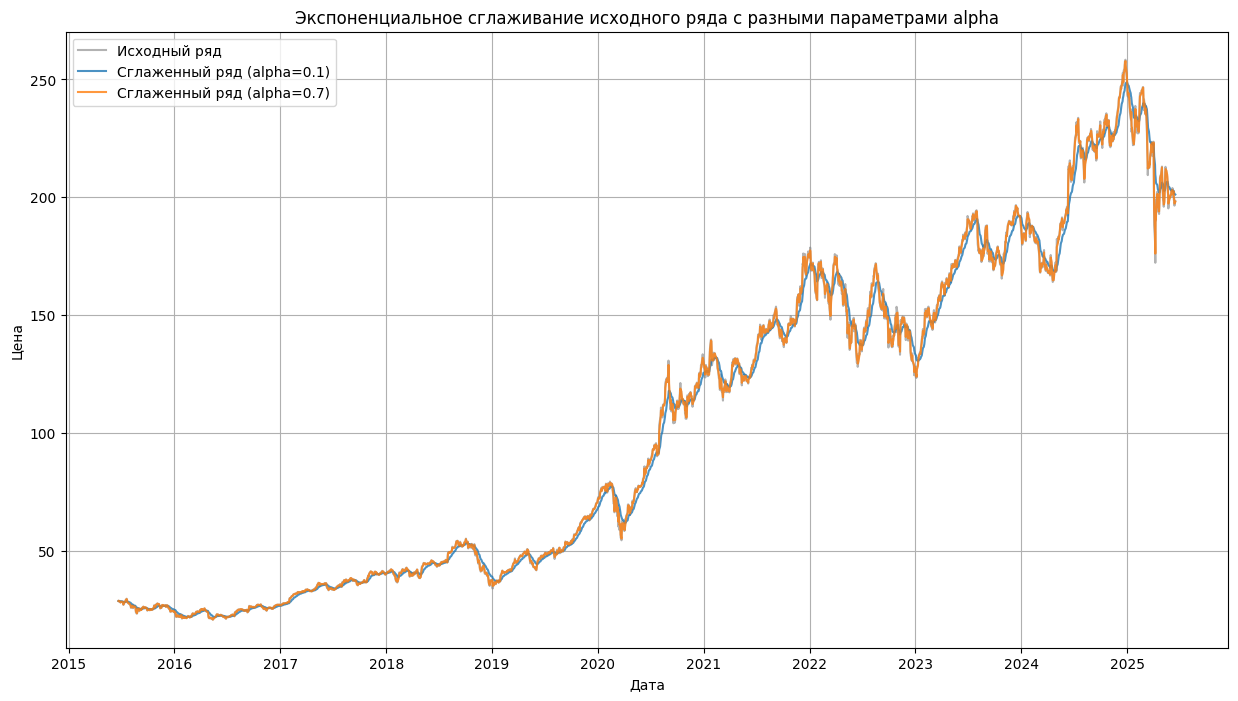

In [ ]:
def simple_exponential_smoothing(series, alpha):
    """
    Performs Simple Exponential Smoothing on a given time series.
    """
    smoothed_series = [series.iloc[0]]
    for i in range(1, len(series)):
        smoothed_value = alpha * series.iloc[i] + (1 - alpha) * smoothed_series[-1]
        smoothed_series.append(smoothed_value)
    return pd.Series(smoothed_series, index=series.index)


# Define different alpha values to compare
alpha_values = [0.1, 0.7]

plt.figure(figsize=(15, 8))
plt.plot(time_series, label="Исходный ряд", color="gray", alpha=0.6)

for alpha in alpha_values:
    smoothed_series = simple_exponential_smoothing(time_series, alpha)
    plt.plot(smoothed_series, label=f"Сглаженный ряд (alpha={alpha})", alpha=0.8)

plt.title("Экспоненциальное сглаживание исходного ряда с разными параметрами alpha")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.legend()
plt.show()
